In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [7]:
# train = pd.read_csv('../input/digit-recognizer/train.csv')
# test = pd.read_csv('../input/digit-recognizer/test.csv')

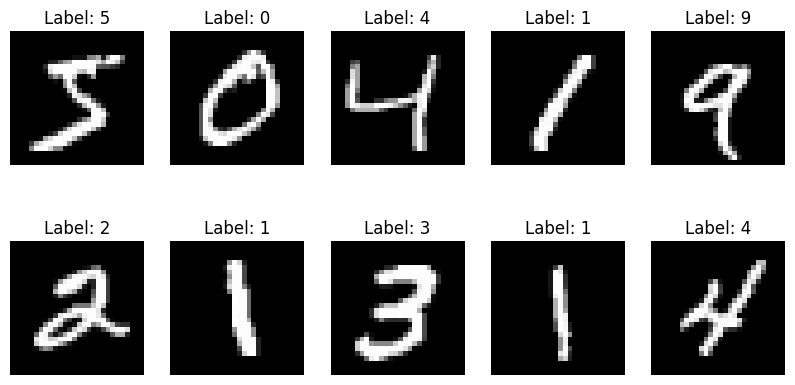

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [9]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [10]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9664
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.94      1.00      0.97      1322
           2       0.98      0.95      0.97      1174
           3       0.96      0.96      0.96      1219
           4       0.97      0.96      0.97      1176
           5       0.96      0.97      0.96      1104
           6       0.98      0.99      0.99      1177
           7       0.96      0.97      0.96      1299
           8       0.99      0.91      0.95      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



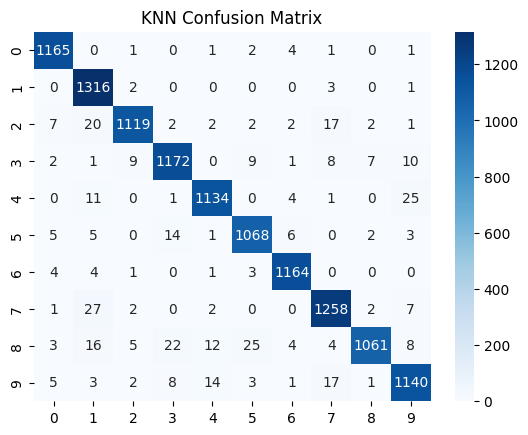

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9664
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.94      1.00      0.97      1322
           2       0.98      0.95      0.97      1174
           3       0.96      0.96      0.96      1219
           4       0.97      0.96      0.97      1176
           5       0.96      0.97      0.96      1104
           6       0.98      0.99      0.99      1177
           7       0.96      0.97      0.96      1299
           8       0.99      0.91      0.95      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



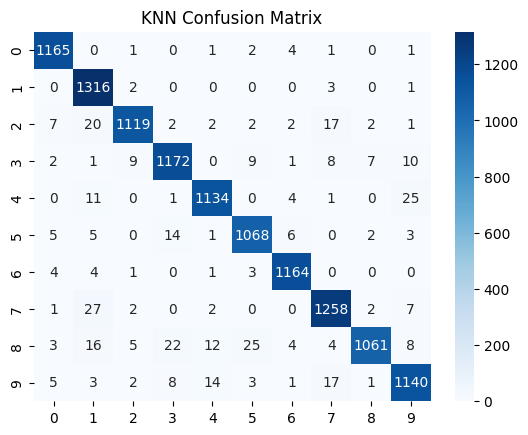

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9573
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1175
           1       0.91      0.99      0.95      1322
           2       0.98      0.93      0.95      1174
           3       0.96      0.95      0.95      1219
           4       0.97      0.95      0.96      1176
           5       0.95      0.96      0.95      1104
           6       0.98      0.98      0.98      1177
           7       0.95      0.96      0.95      1299
           8       0.98      0.90      0.94      1160
           9       0.94      0.95      0.94      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



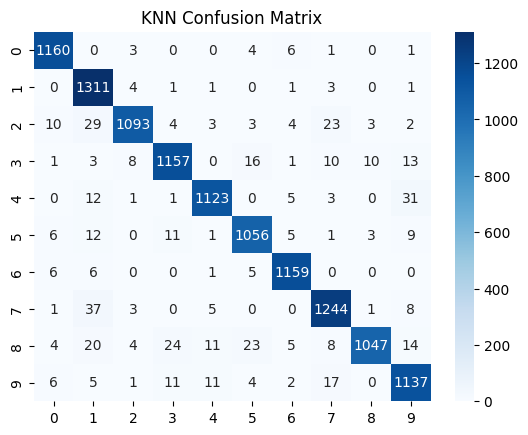

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



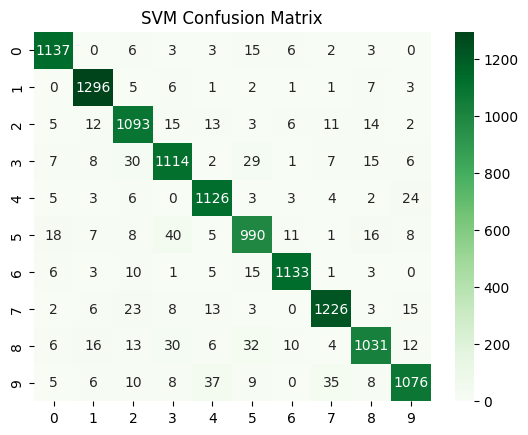

In [14]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



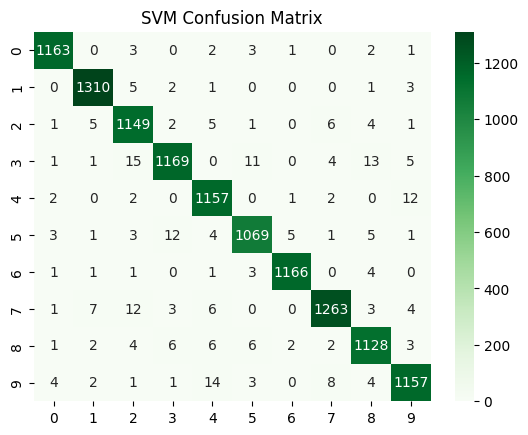

In [15]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1175
           1       0.98      0.99      0.98      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.96      0.98      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.98      0.96      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



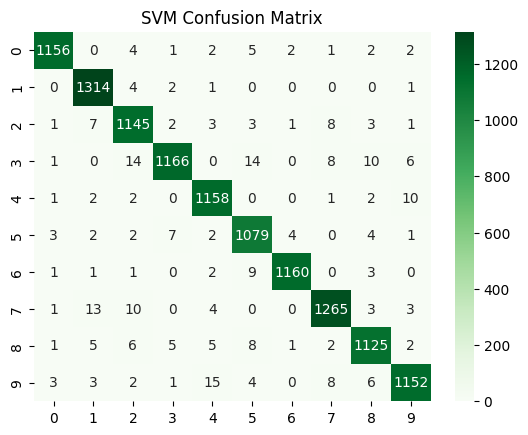

In [16]:
svm_model = SVC(kernel='poly')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.7765
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1175
           1       0.86      0.93      0.89      1322
           2       0.73      0.75      0.74      1174
           3       0.80      0.71      0.75      1219
           4       0.79      0.85      0.82      1176
           5       0.59      0.63      0.61      1104
           6       0.86      0.82      0.84      1177
           7       0.88      0.81      0.84      1299
           8       0.66      0.69      0.68      1160
           9       0.78      0.69      0.73      1194

    accuracy                           0.78     12000
   macro avg       0.78      0.77      0.77     12000
weighted avg       0.78      0.78      0.78     12000



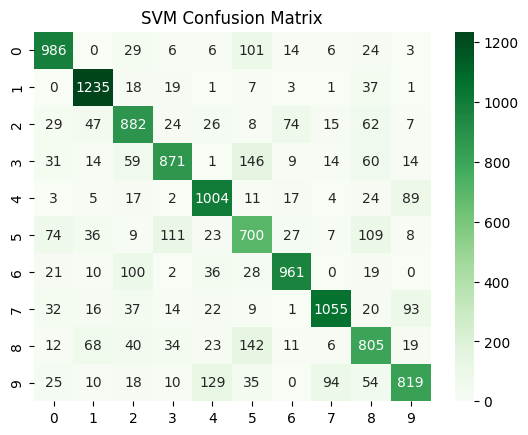

In [17]:
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

Decision Tree Validation Accuracy: 0.8680
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1175
           1       0.93      0.96      0.94      1322
           2       0.85      0.85      0.85      1174
           3       0.85      0.83      0.84      1219
           4       0.86      0.87      0.86      1176
           5       0.82      0.82      0.82      1104
           6       0.91      0.88      0.90      1177
           7       0.90      0.91      0.91      1299
           8       0.80      0.78      0.79      1160
           9       0.82      0.85      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



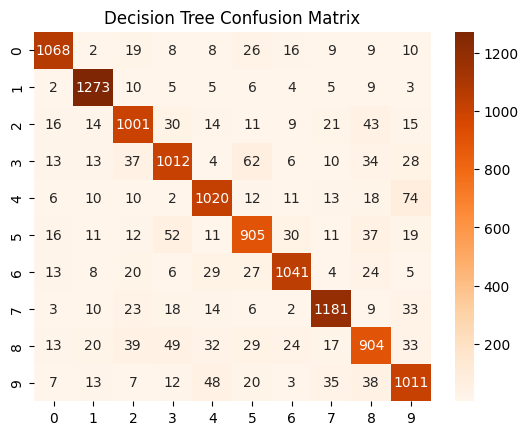

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split, y_train_split)
y_val_pred_dt = dt_model.predict(X_val)
dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')
print(classification_report(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)
y_val_pred_rf = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Validation Accuracy: {rf_acc:.4f}')

Random Forest Validation Accuracy: 0.9693


In [20]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)
xgb_model.fit(X_train_split, y_train_split)
y_val_pred_xgb = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, y_val_pred_xgb)
print(f'XGBoost Validation Accuracy: {xgb_acc:.4f}')

XGBoost Validation Accuracy: 0.9770


In [21]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to add a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.8612 - loss: 0.4455 - val_accuracy: 0.9799 - val_loss: 0.0642
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 63s 66ms/step - accuracy: 0.9807 - loss: 0.0626 - val_accuracy: 0.9870 - val_loss: 0.0435
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9887 - loss: 0.0371 - val_accuracy: 0.9848 - val_loss: 0.0504
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.9910 - loss: 0.0272 - val_accuracy: 0.9863 - val_loss: 0.0471
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9887 - val_loss: 0.0425
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9893 - val_loss: 0.0409
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.9893 - val_loss: 0.0421
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9969 - loss: 0.0087 - 

In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Reduce to 100 dimensions
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Split a validation set
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=42)
print(f"Original shape: {x_train_flat.shape}")  # Rows and original features
print(f"Reduced shape: {x_train_pca.shape}")    # Rows and reduced features


Original shape: (60000, 784)
Reduced shape: (60000, 100)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_split, y_train_split.argmax(axis=1))  # Use argmax to convert one-hot to labels
y_pred_knn = knn.predict(x_test_pca)
accuracy_knn = accuracy_score(y_test.argmax(axis=1), y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")


KNN Accuracy: 0.9719


In [24]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_split, y_train_split.argmax(axis=1))
y_pred_svm = svm.predict(x_test_pca)
accuracy_svm = accuracy_score(y_test.argmax(axis=1), y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")


SVM Accuracy: 0.9815


In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_split, y_train_split.argmax(axis=1))
y_pred_dt = dt.predict(x_test_pca)
accuracy_dt = accuracy_score(y_test.argmax(axis=1), y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Accuracy: 0.8242


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_split, y_train_split.argmax(axis=1))
y_pred_rf = rf.predict(x_test_pca)
accuracy_rf = accuracy_score(y_test.argmax(axis=1), y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9474


In [27]:
print(f"Test Accuracy (CNN): {test_acc}")
print(f"Test Accuracy (KNN): {accuracy_knn}")
print(f"Test Accuracy (SVM): {accuracy_svm}")
print(f"Test Accuracy (Decision Tree): {accuracy_dt}")
print(f"Test Accuracy (Random Forest): {accuracy_rf}")

# Interpretation
if test_acc > max(accuracy_knn, accuracy_svm, accuracy_dt, accuracy_rf):
    print("The CNN performs better on the MNIST dataset.")
else:
    print("The base models with dimensionality reduction perform better.")


Test Accuracy (CNN): 0.989300012588501
Test Accuracy (KNN): 0.9719
Test Accuracy (SVM): 0.9815
Test Accuracy (Decision Tree): 0.8242
Test Accuracy (Random Forest): 0.9474
The CNN performs better on the MNIST dataset.


In [28]:
import numpy as np
import pandas as pd
from google.colab import files

# Generate predictions on the test set
y_pred_cnn = model.predict(x_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_cnn, axis=1)

# Create a DataFrame with the required format
output_df = pd.DataFrame({
    'ImageId': np.arange(1, len(y_pred_labels) + 1),
    'Label': y_pred_labels
})

# Save the DataFrame as a CSV file
output_file = 'mnist_predictions_cnn.csv'
output_df.to_csv(output_file, index=False)

# Download the CSV file to your local machine
files.download(output_file)

print("CSV file with predictions saved and ready for download!")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file with predictions saved and ready for download!
